 <h1><center>Introduction to Numerical Computing whit NumPy</center></h1>

# Numpy Arrays

NumPy arrays are the main way we will use Numpy throughout the course. Numpy arrays essentially come in two flavors: vectors and matrices. Vectors are strictly 1-d arrays and matrices are 2-d (but you should note a matrix can still have only one row or one column).

In [1]:
import numpy as np

In [5]:
pi=3.14

# Creating Array

In [6]:
#integer array
a= np.array([0,1,2,3])

In [7]:
# Unlike List NumPy is constrainde to array that all contein the same type. If types do not match, NumPy upcas if possible (here integer is upcast fo float)
np.array([3.14,5,2,55,66,11,34.1111])

array([ 3.14  ,  5.    ,  2.    , 55.    , 66.    , 11.    , 34.1111])

In [8]:
#If we want to explicitly set the data type of the resulting array, we can used dtype keyword:
np.array([1,2,3,4], dtype="float64")

array([1., 2., 3., 4.])

In [27]:
#Checking the type
print(type(a))
#numeric type of elements
print(a.dtype)
#number od dimensions
print(a.ndim)
#array shape
print(a.shape) #returns a tuple listing the length of the array along each dimension 
#bytes per element
print(a.itemsize)
#bytes of mememory used
print(a.nbytes)

<class 'numpy.ndarray'>
int32
1
(4,)
4
16


### Creating array from scrach

* zeros
* ones
* full
* arange
* linspace
* random.random
* random.normal
* random.randint
* eye
* indentity
* empty
* fill
* logspace
* loadtext

Especially for longeer array, it is more efficient to create array from scratch using routines built int NumPy. Here are several examples:

#### arange()

In [13]:
#arange [start:stop:step]
np.arange(0,10)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
np.arange(0,12,2)

array([ 0,  2,  4,  6,  8, 10])

In [14]:
np.arange(0,2*pi,pi/4)

array([0.   , 0.785, 1.57 , 2.355, 3.14 , 3.925, 4.71 , 5.495])

#### zeros,ones,full,identity,empty,fill,eye

In [15]:
#create a length-10 integer array filled with zeros
np.zeros(10,dtype=int)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
#create 3x5 floting-point array filledwith 1s
np.ones((3,5),dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [32]:
#creata 3x5 array filled with 3.14
np.full((3,5),3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [25]:
#create an n by n identity arrey
a=np.identity(4, dtype=int)
print(a)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [40]:
# create empty array
a=np.empty(2)
a

array([6., 6.])

In [42]:
# fill empty array
a.fill(6.0)
a

array([6., 6.])

In [46]:
#Create a 3x3 identity matrix (Return a 2-D array with ones on the diagonal and zeros elsewhere)
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### linspace,logspace

In [43]:
#cerate array of five values evenly spaced  between 0 and 1(return every nmber between intervals)
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [44]:
#create N evenly spaced elements on a log scales between base-start ans base-stop(default base 10)
np.logspace(0,1,5)

array([ 1.        ,  1.77827941,  3.16227766,  5.62341325, 10.        ])

#### random.

In [47]:
#create 3x3 array of uniformly distributed random values between 0 and 1, or random.rand for 1-dim array
np.random.random((3,3))

array([[0.51999152, 0.26829723, 0.66570332],
       [0.79224366, 0.75424433, 0.01001791],
       [0.6118622 , 0.13332143, 0.54011686]])

In [49]:
np.random.rand(4)

array([0.39154157, 0.00602476, 0.95279172, 0.00485677])

In [50]:
#Create 3x3 array of normal distributed random values with mean 0 and standard deviation 1, or random.randn for 1-dim
np.random.normal(0,1,(3,3))

array([[ 1.83056115,  0.66524546, -0.32315821],
       [-0.62883527,  0.88388057,  0.98715114],
       [ 0.59813565, -1.8494642 ,  0.20248891]])

In [51]:
np.random.randn(4)

array([ 0.43492903, -0.17601724, -0.57653262, -0.90118079])

In [52]:
# crate array od random integer in the interval [0,10)
np.random.randint(0,10,(3,3))

array([[9, 5, 9],
       [5, 6, 8],
       [8, 4, 7]])

# Computations on NumPy arrays: Universal Functions

Computation on NumPy arrays can be fast or can be very slow. The key to making it faster is to used __vectorized__ operation, generallyimplementing through NumPy __universal function__(ufuncs). Te relative sluggishness of Python generally manifest itseltf in situation where many small operations are being repeated - for instance, looping over array to operate on each element. For example, imagines we have an array of values and we would like to compute the reciprocal of each. A strightforward approach might look like this:

In [1]:
import numpy as np
def compute_reciprocals(values):
    output=np.empty(len(values))
    for i in range(len(values)):
        output[i]=1.0/values[i]
    return output

values=np.random.randint(1,10, size=5) # size=Non tell python to return just one number
compute_reciprocals(values)

array([0.11111111, 0.16666667, 0.125     , 0.33333333, 0.16666667])

This programs feels fairly natural to someone from _C_ or _Java_ backgraound.But if we measure execution time of this code for a longe input, we see that this operation i very slow.

In [44]:
big_array=np.random.randint(1,100,size=1000000)
%timeit compute_reciprocals(big_array)

6.25 s ± 337 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It takes several second to compute these million operation and to store the result!
For many types of operations, NumPy provides a convenient iterface into just this kind of statilly type, compiled routine. This is known as a _vectorized_ operation. We can accomplish this by simply performing an operation on the array, which will then be applied to each element. 
Compere the results of the following two:

In [46]:
print(compute_reciprocals(values))
print(1.0/values)

[0.125      0.125      0.125      0.25       0.16666667]
[0.125      0.125      0.125      0.25       0.16666667]


In [48]:
%timeit (1.0/big_array)

19.8 ms ± 3.49 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Vectorized operation in NumPy is implemented via _ufunk_, whose main purpose is to quckly execute repeted operation in values in NumPy array. Ufuncs are very flexible. Example:

In [50]:
a=np.array([1,2,3,4])
b=np.array([2,3,4,5])

### Exploring NumPy Ufuncs

Ufuncs exist in two flavors: unary ufuncs, whitch operate on a single input, and binary ufuncs which operate on two input.
We will see exampel od both here:

#### Array aritmetric

NumPy ufuncs feel very natural to used because they make use of Python native aritmetric operation. Standard addition, substractin, multiplicatin and devison can be all used:

In [70]:
a=np.arange(4)
print("a =", a)
print("a + 5 = ",a+5)
print("a - 5 = ",a-5)
print("a * 5 =",a*2 ) 
print("a / 2 =",a/2)
print("a // 2 =",a//2)
#there are operation for negation, a ** operation for exponentiation, and a % operation form modulues
print("-a  =", -a)
print("a ** 2 = ",a**2)
print("a % 2= ",a%2)

a = [0 1 2 3]
a + 5 =  [5 6 7 8]
a - 5 =  [-5 -4 -3 -2]
a * 5 = [0 2 4 6]
a / 2 = [0.  0.5 1.  1.5]
a // 2 = [0 0 1 1]
-a  = [ 0 -1 -2 -3]
a ** 2 =  [0 1 4 9]
a % 2=  [0 1 0 1]


#### Absolute value, trigonometric,exponents, logarithms

Just as NumPy understand Python build-in artitmetric operatios, it also undenstands Python build-in absolute values function 

In [72]:
#absolute value
a=np.array([-2,-1,0,1,2])
abs(a)

array([2, 1, 0, 1, 2])

Corresponding NumPy ufunc is __np.absulute__, which is also avaible under the alias __np.abs__

In [73]:
np.absolute(a)
np.abs(a)

array([2, 1, 0, 1, 2])

In [76]:
# This ufunc can handle complex number in which the absolute values return magnitude:
a=np.array([3-4j,4-3j,2+0j,0+1j])
print(a)
print(np.abs(a))

[3.-4.j 4.-3.j 2.+0.j 0.+1.j]
[5. 5. 2. 1.]


In [78]:
#Trigonometric
theta=np.linspace(0,np.pi,3)

print("theta = ",theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [79]:
# Inveres trigonometric 

a=[-1,0,-1]
print("a = ",a)
print("arcsin(theta) = ", np.arcsin(a))
print("arccos(theta) = ", np.arccos(a))
print("arctan(theta) = ", np.arctan(a))

a =  [-1, 0, -1]
arcsin(theta) =  [-1.57079633  0.         -1.57079633]
arccos(theta) =  [3.14159265 1.57079633 3.14159265]
arctan(theta) =  [-0.78539816  0.         -0.78539816]


In [81]:
# exponents and logarithms

#eponents
x=[1,2,3]

print("x = ",x)
print("e^x = ", np.exp(x))
print("2^x = ", np.exp2(x))
print("3^x = ", np.power(3,x))

x =  [1, 2, 3]
e^x =  [ 2.71828183  7.3890561  20.08553692]
2^x =  [2. 4. 8.]
3^x =  [ 3  9 27]


In [86]:
#logaritham

x=[1,2,4,10]

print("x = ",x)
print("ln(x) = ", np.log(x))
print("log2(x) = ", np.log2(x))
print("log10(x) = ", np.log10(x))

x =  [1, 2, 4, 10]
ln(x) =  [0.         0.69314718 1.38629436 2.30258509]
log2(x) =  [0.         1.         2.         3.32192809]
log10(x) =  [0.         0.30103    0.60205999 1.        ]


### Advance ufunc features

#### Specifying output

For large calcuation, it is sometimes useful to be able to specify the array where the result of the calsuation will be stored. Rather then creating a temperary array, you can used this to write computation result directly to the memory location where you would like them to be. For all unifunc, you can fo this using the out argument of the function:

In [9]:
a=np.arange(5)
b=np.empty(5)
np.multiply(a,10,out=b)
print(a)
print(b)

[0 1 2 3 4]
[ 0. 10. 20. 30. 40.]


In [13]:
# this can be used with array views. We can write results of a computation to every other elements of a specified array:
b=np.zeros(10)
np.power(2,a,out=y[::2]) #2^a
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


#### Aggregate



For binary ufunc, there are some interesting aggregate that can be computed directly from object. For example, if we would like to __reduce__ an array with a particular operatin, we can used reduced method on any ufunc. Reduced repeatedly applies a given operation to the elements of an array until only a single result remains.

For example, calling reduced on the add ufunc return the sum od all elements in the array:

In [14]:
a=np.arange(1,6)
np.add.reduce(a)

15

Similarly, calling reduce on the multiply ufunc result in the product of all array elements. If we wont to store results of the computation we can used __accumulate__.

In [15]:
np.multiply.reduce(a)

120

In [16]:
np.multiply.accumulate(a)

array([  1,   2,   6,  24, 120], dtype=int32)

Any ufunc can compute the output of all pairs ot two different inputs using tje __outer__ method.This allows you, in one line, to do things like createa mulitplication table: 

In [19]:
a=np.arange(1,6)
np.multiply.outer(a,a)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

#### Aggregation: Min,Max and Everything Between

Often when you are faced with a large amount of data, a first stp is to compute statistics dfor the tada in question. Most common summary statistics ate mean, standard deviation, but other aggregation are useful as well(the sum, productm, median, minimum and maximum, quatiles, etc.)

#### Summing the values in an array

Python can do this using the built-in function __sum()__, in NumPy syntax in quite similar, and result is the same

In [24]:
import numpy as np
#python built-in
l=np.random.random(100)
print(sum(l))
#NumPy
print(np.sum(l))

46.27540655780677
46.275406557806754


In [25]:
#NumyPy version of the operation is computed much more quickly:
big_array=np.random.random(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

292 ms ± 28.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.66 ms ± 271 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Minimum and Maximum

In [ ]:
# similary python has built-in min and max and corresponding functin in NumPy np.min() and np.max

In [27]:
#python buil-in
print(min(big_array))
print(max(big_array))
#NumPy
print(np.min(big_array))
print(np.max(big_array))

2.7239842237403167e-07
0.9999999441030138
2.7239842237403167e-07
0.9999999441030138


In [28]:
%timeit min(big_array)
%timeit np.min(big_array)

179 ms ± 4.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.83 ms ± 559 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Multidimensional aggregation

One common type of aggregation operation is an aggregate along a row and column.
Say we have data stored in 2-dimensional array

In [30]:
M=np.random.random((3,4))
print(M)

[[0.01686024 0.36481134 0.98660598 0.31749868]
 [0.45143885 0.9958938  0.45330852 0.51354934]
 [0.52425094 0.06974814 0.34389574 0.99228892]]


By default , NumPy aggreagation function wull return the aggregate over the entire array. Aggreagate function take an additional argument specifying the _axis_ along which the aggreagate is computed. FOr exmple we can find the minimum values withineach column by specifying _axis_=0:

In [31]:
#aggreagate whitout argument axis, aggregate throug all array
M.sum()

6.0301505049108775

In [32]:
M.min(axis=0)

array([0.01686024, 0.06974814, 0.34389574, 0.31749868])

In [33]:
# similarly, we can find the maxinum and minimum values for each row:
M.min(axis=1)

array([0.01686024, 0.45143885, 0.06974814])

<center><img src='img\aggregate1.png'/></center>

#### loadtext

In [54]:
# automatically generated an array from the text file


<center><img src='img\text.png' /></center>

In [57]:
arr=np.loadtxt('data.txt', skiprows=1,dtype=int,delimiter=",",usecols=(0,1,2,4),comments="%")
arr

array([[   1,    1, 2000,   13],
       [   4,    1, 2000,   55]])

In [58]:
# save an arr into a txt file
np.savetxt('filename',arr)

## Reshape

#### reshape and np.newaxis

Another useful type of operation is reshape of array. This most flexible way of doing this is with the __reshape()__ method. For example, if you want to put numbers 1 trought 9 in 3x3 grid, you can do following:

In [13]:
grid=np.arange(1,10).reshape((3,3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Not that for this to work, the size of initial array must match the size of the reshape array. Another commons reshaping pattern is the conversion of a one-dimensional array into a two-dimensional row and columns matrix. You can do this with the reshape method, or more easily by making use of the __newaxis__ keyword within a slice operation:

In [17]:
x=np.array([1,2,3])
# row vector via reshape
print("via reshape: ",x.reshape((1,3)))
# row vector via newaxis
print("via newaxis: ",x[np.newaxis,:])

via reshape:  [[1 2 3]]
via newaxis:  [[1 2 3]]


In [20]:
# column vector via reshape
print("via reshape: \n", x.reshape((3,1)))
# column vector via newaxis
print("via newaxis: \n", x[:,np.newaxis])

via reshape: 
 [[1]
 [2]
 [3]]
via newaxis: 
 [[1]
 [2]
 [3]]


## Shape

Shape is an attribute that arrays have (not a method):

In [49]:
# Vector
arr.shape

(25,)

In [54]:
# shape return a tuple (dimension,)
# brackets don't make tuple, that's what comma are doing
f=(5)
print(type(f))
f=(5,)
print(type(f))

<class 'int'>
<class 'tuple'>


In [44]:
# Notice the two sets of brackets
arr.reshape(1,25)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24]])

In [45]:
arr.reshape(1,25).shape

(1, 25)

In [46]:
arr.reshape(25,1)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24]])

In [55]:
arr.reshape(25,1).shape

(25, 1)

In [14]:
# Convert a string or number to a floating point number, if possible.
np.nan

nan

# Indexing and Slicing

If we are familiar whit Python list indexing, indexing in NumPy will feel quite familiar. In one dimensional array you can the i-th values (counting fro zero) by specifying the desired index in square brackets, just as with Python list.

Just as we can used squred brackets to access individual elements, we can also use tham to access subarray with the __slice__ notation, marked by the column __(:)__ character. NumPy slicing sintax follows that of the standard python list

        a[start:stop:step]

#### Indexing/slicing

<center><img src='img\indexing.png' /></center>

In [3]:
a=np.array([0,1,2,3])
# get a value at an index
print(a[0])
# get value in a range
print(a[1:3])
#Index from the end od the array, you can used negatice indexing
print(a[-1])


0
[1 2]
3


<center><img src='img\indexing2.png' /></center>

In [16]:
# array is mutable object, we can change elements in array
a[0]=10
a

array([10,  1,  2,  3])

### Beware Of Type Coercion

In [18]:
# np array is homogen, every single elements of array is a same type
a.dtype

dtype('int32')

In [25]:
# assigning a float into an int32 array truncates the decimal part
a[0]=10.4
a

array([10,  2,  3,  4,  5])

In [2]:
# how NumPy recognize what type list is it?
# if everything is integer the type of array is integer
# is one of tham a float the array is be float
# is one of tham a complex array is complex
a=np.array([1,2,3,4,5])
print(a.dtype)
b=np.array([1,2,3,4,5.1])
print(b.dtype)
c=np.array([1,2,3,4,5,3+1j])
print(c.dtype)

int32
float64
complex128


In [28]:
# fill has the same behaviors
a.fill(-4.5)
a

array([-4, -4, -4, -4, -4])

In [59]:
# we can forcing type of array by put dtype
x=np.array([1,2,3,4,5], dtype='float')
x.dtype

dtype('float64')

# Multi-Dimensional Arrays


In [33]:
# list of list
a=np.array([[0,1,2,3],
            [10,11,12,13]])
a

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13]])

<center><img src='img\2d.1.png' /></center>

In [41]:
# Shape (rows, columns)
print(a.shape)
# Element count
print(a.size)
# Number of dimensions
print(a.ndim)

(2, 4)
8
2


<center>Shape:<img src='img\2d.2.png' /></center>
<center>Element count:<img src='img\2d.3.png' /></center>
<center>Number of dimensions:<img src='img\2d.4.png' /></center>

In [44]:
# Type:
print(a.dtype)
# Total number of element
print(a.size)
# Number of bytes
print(a.nbytes)


int32
8
32


#### GET/SET ELEMENTS

You access intems using a comma-separatedf tuple of indices:
<center><img src='img\2d.7.png' /></center>

In [45]:
a

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13]])

In [49]:
# get element for first row and third column
a[1,3]

-1

In [48]:
# Change 2D array element
a[1,3] = -1
a

array([[ 0,  1,  2,  3],
       [10, 11, 12, -1]])

<center><img src='img\2d.5.png' /></center>

In [50]:
# Address second (oneth) row using single index
a[1]

array([10, 11, 12, -1])

<center><img src='img\2d.6.png' /></center>

# Indexing and Slicing

### Slicing

**var[start,stop,step]**<br>
Exrtact a portion of a sequence by specifying start and stop bound.<br>
The lower-bound element is includeed, but the upper element is **not** included.<br>
Mathematically: [lower,upper). The step value specifies the stride between elements.

In [3]:
# slicing 1-d array
#           -5 -4 -3 -2 -1
#            0  1  2  3  4 
a=np.array([10,11,12,13,14])
# positiv indices 
a[1:3]

# negative indices
a[1:-2]  # drop first one and drop second from the end

# do not recommend this type of slicing
a[-4:3]

array([11, 12])

In [4]:
# OMITTED INDEXING
# omitted banderies are assumed to beginning(or end) of the list

# grab fist three elements
a[:3]
# grab last teo elements
a[-2:]
# every other element
a[::2]


array([0, 2])

### subarrays an no-copy

One important - end extremely usefull- thing to know about array slicing is that thay return views rather than copies of the array data. This is area in which NumPy slicing is differs from Python slicing: in list, slices will be copy.

If we modify this subarray, we will see that orginal array is changed!<br> This is actually useful: it means that when we work with large dataset, we can access and process pieces ot these dataset without the need to copy the underlying data buffer.


In [6]:
a

array([0, 1, 2, 3])

In [5]:

slice_arr=a[1:3]

# Show Slice 
slice_arr

array([1, 2])

In [8]:
# If we modify this subarray, we will see that orginal array is changed!
# Change Slice
slice_arr[:]=99

#Show Slice
slice_arr

array([99, 99])

In [7]:
# Slice are references to memory in the original array
# Change values in a slice also changes the original array
a
# This tall us data is not copy, it is view of the original array!

array([0, 1, 2, 3])

####  Creating copies of array

It is sometimes useful to instead explicitly copy the data within an array or a subarray. This can be easly done with the __copy()__ method.

In [9]:
arr_copy=a.copy()
print(arr_copy)


[0 1 2 3]


In [10]:
# If we now modify this subarray the orinal array is not touched
arr_copy[1]=-99
print(arr_copy)
print(a)

[  0 -99   2   3]
[0 1 2 3]


## Indexing a 2D array (matrices)

The general format is **a[row][col]** or **a[row,col]**. I recommend usually using the comma notation for clarity.

<center><img src='img\2d.8.png' /></center>

In [28]:
a=np.array(([0,1,2,3,4,5],
            [10,11,12,13,14,15],
            [20,21,22,23,24,25],
            [30,31,32,33,34,35],
            [40,41,42,43,44,45],
            [50,51,52,53,54,55]))


In [29]:
#Indexing row
a[3]

array([30, 31, 32, 33, 34, 35])

In [31]:
# Format is a[row][col] or a[row,col]
# Getting a element
a[3][4]
# Getting a element 
a[3,4]

34

In [19]:
# Slicing 2D array:
# grab first row and all element from [3,5) column
Yellow=a[0,3:5]
# grab every rows from 4 to the end and grab every columns from 4 to the end
Blue=a[4:,4:]
# Grab all rows and column whit index 2 
Red=a[:,2]

print(Yellow)

print(Blue)

print(Red)



[3 4]
[[44 45]
 [54 55]]
[ 2 12 22 32 42 52]


In [26]:
# tip: every time when we indexing we drop dimension, and when we slice keep dimension
g=np.array([1,2,3,4])
print(f"Array dimension: {g.ndim}")

# Indexing
print(f"Indexing: {g[1].ndim}")

# Slicing
print(f"Slicing: {g[1:].ndim}")

Array dimension: 1
Indexing: 0
Slicing: 1


In [27]:
# Steps are also possible

a[2::2,::2] # from row 0 until the end in step of two
            # and for columns we go from beginning to the end in step of two

array([[20, 22, 24],
       [40, 42, 44]])

# Multi-Dimensional Array -Visualisation

<center><img src='img\2d.11.png' /></center>

# Computations whit Arrays: Broadcasting


We saw how NumPy universal functin can be used to _vectorize_ operations and thereby remove slow Python loops. Another means of vectorizedng operations is to used NumPy _broadcasting_ functionality. Broadcasting is simply a set of rules for applying binary ufunc (addition, substraction, multiplication, etc.) on arrays od different size.

### Introduction to Broadcastng

Recall that arrays of the same size, binary operations are preformed on a element-by-element basic:


In [22]:
a=np.array([0,1,2])
b=np.array([5,5,5])
a+b

array([5, 6, 7])

Broadcasting allow these types of binary operations to be performed on arrays of different size- for example, we can just as easily add a scalar to an array:

In [23]:
a+5

array([5, 6, 7])

We think ot this as a sn operation that stretches or duplicates of values 5 into the array [5,5,5] and adds the result. The advantage of NumPy broadcasting is that this duplication of values does not actually take place, but it is a useful as we think about broadcasting.
We can similary exted this array of higher dimension. Observe the result when we add one  dimensional array to a two dimensional array:

In [24]:
M=np.ones((3,3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [26]:
M+a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Here one dimezional array is stretched, or broadcast, across the second dimension in order to match the shape od M. These example are relatively easy to understand, more complicated cases can involve broadcasting both array.

In [29]:
a=np.arange(3)
b=np.arange(3)[:,np.newaxis]
print(a)
print(b)
a+b

[0 1 2]
[[0]
 [1]
 [2]]


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In this example we stretched or broadcating both a and b to match a common shape, and result is two dimension array.

<center><img src='img\broadcast1.png' /></center>

### Rule of Broadcasting

**Rule1**: If the two arrays differ in their number of dimesion, the shape of the one with smaller dimensions is __padded__ with ones uts leading (left) side.

**Rule2**: If the shape of the two arrays does not match in any dimesnion, the array with shape equal to 1 in that dimesion is stratched to match the other shape.

**Rule3**: If in any dimension the size disagree and neither is equal to 1, an error is raised.

Take a look at a couple simple example of where thay can be useful:
        
  __Plotting a two-dimensional function__


One place where broadcasting is very useful is in displaying images based ot two-dimensional functions. If we want to define a function __z=f(x,y)__ bradcasting can be used to compute the function across the grid:


In [8]:
x=np.linspace(0,50,5)
y=np.linspace(0,50,5)[:,np.newaxis]

z=np.sin(x)**10+np.cos(10+y*x)*np.cos(x)

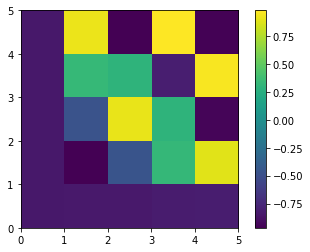

In [10]:
# we will used matplotlib to plot two-simesional array
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(z,origin="lower",extent=[0,5,0,5], cmap="viridis")
plt.colorbar();

### Comparison, Masks, and Boolean Logic

The use of boolean masks to examine and manipulate values within NumPy array. Maskin g comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion: for example, you might wish to count all values grather than a certain values, or perhaps remove all out-liers that are above some threshold. In NumPy, boolean masking is often the most efficient way to accomplish these types of tasks.

#### Example: Counting rainy days

Images we have series of data that represent the amount of rainfall each day for a year in given city. For exam pel, here we'll load the daily rainful statistic for city of Seattle in 2014, using Pandas


In [19]:
import numpy as np
import pandas as pd

rainfall=pd.read_csv("Seattle2014.csv")['PRCP'].values
inches=rainfall/254
inches.shape

(365,)

### Comparison operators as ufuncs

NumPy also implements comparison operators such as <(less than) and >(greater then) as element-wise ufunc.The result of these comparison operators is always an array with Boolean data type. Al six ot the standard comparison operations are available:

In [20]:
x=np.array([1,2,3,4,5])
x<3 #less than

array([ True,  True, False, False, False])

In [22]:
x>3 #greater than

array([False, False, False,  True,  True])

In [23]:
x<=3 #less than or equal

array([ True,  True,  True, False, False])

In [24]:
x>=3 #greater or equal

array([False, False,  True,  True,  True])

In [25]:
x!=3 # not equal

array([ True,  True, False,  True,  True])

In [26]:
x==3 #equal

array([False, False,  True, False, False])

Just as in the case of aritmetric ufunc, these will work on array of any size and shape. Here is example of two-dimesional array:

In [29]:
rng=np.random.RandomState(0)
x=rng.randint(10,size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [30]:
x<6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

### Working with boolean arrays

In [31]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [32]:
#Counting entries
# to count the number of True entries in Boolean array, np.count_nonzero is useful:
#how many values less than 6?
np.count_nonzero(x<6)

8

In [33]:
#anather way to do this is used sum() in this case False is interpreted as 0 and True is interpreted as 1
np.sum(x<6)

8

In [35]:
# The benefit of sun() is this like with other NumPy aggregation functions, this summations can be dne along row and columns as well:
np.sum(x<6, axis=1)

array([4, 2, 2])

In [36]:
#are there any values greather than 8
np.any(x>8)

True

In [37]:
#are all values less than 10
np.all(x<10)

True

In [38]:
# np.all() and np.any() can be used along particular axes as well.

np.all(x<8, axis=1)

array([ True, False,  True])

# Fancy Indexing
Fancy indexing allows you to select entire rows or columns out of order,to show this, let's quickly build out a numpy array:

<center><img src='img\2d.9.png' /></center>

In [72]:
a = np.arange(0,80,10)
print(a)
# Every thime when we used fancy indexing we got a copy, and every time when we used slicing we
# work in same memory -- give a view
# indexing by position

indices=[1,2,-3]
y=a[indices]
print(y)

# indexing with boolean
# Create mask
mask=np.array([0,1,1,0,0,1,0,0],dtype=bool)

# Conditional create of mask
mask2=a<30
y=a[mask2]
print(y)
# very important, mask and array must have same number od elements

a=np.array([3,-1,-2,4,-5,8])
# create mask for negatives number
negative=a<3
print(a[negative]) # a[a<0] is also work

# using mask to change array, modify array inplace but 
a[a<0]=0
print(a)

[ 0 10 20 30 40 50 60 70]
[10 20 50]
[ 0 10 20]
[-1 -2 -5]
[3 0 0 4 0 8]


#### boolean

In [73]:
a<8

array([ True,  True,  True,  True,  True, False])

In [74]:
a>3

array([False, False, False,  True, False,  True])

In [75]:
a>3 and a<8 # and, or expect one true or one false not array of true and or-s
             # python in confused

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [76]:
# any()
#Returns True if any of the elements of `a` evaluate to True.
(a<8).any()

True

#### Binary and Bitwise Operator

Binary operators: and, or, not - expect one true or one false for each side<br>
Bitwise operator: &(and), |(or), ~(not), ^(hor) - accept more then one paramether

In [82]:
negatives=(a>3)&(a<8)
negatives
# position on True
np.nonzero(negatives) #Return the indices of the elements that are non-zero.
a=np.array([10,1,20])
b=np.array([2,3,20])
a>b #everything what is boolean array we can used like mask
np.nonzero(a>b)

(array([0], dtype=int32),)

In [39]:
# are this betwidse operators overloaded for np?
# yes and no. 
f=6 
g=5
f + g
f.__add__(g) # python translate this call to a this method--"special methods". part pzthon protocol. we can see them used f.__
            # everthis is cand overloaded

11

### Boolean array as masks

Use boolean arrays as mask, to select particular suset ot the data themselves.


In [40]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [41]:
# obtain boolean array
x<5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [ ]:
# now to select these values from the array, we can simply index on this boolean array, this is known as MASKING

In [42]:
x[x<5]

array([0, 3, 3, 3, 2, 4])

### Fancy indexing in 2D array

<center><img src='img\2d.10.png' /></center>

In [84]:
a= np.arange(36).reshape(6,6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [85]:
# Yellow
a[[0,1,2,3,4],[1,2,3,4,5]] #like decart product (Rowe x Column)

array([ 1,  8, 15, 22, 29])

In [86]:
# Blues
a[3:,[0,2,5]] #we can't do this whit slicing because this is step of one and step of two

array([[18, 20, 23],
       [24, 26, 29],
       [30, 32, 35]])

In [87]:
# used mask

# Red
mask=np.array([1,0,1,0,0,1],dtype=bool) # tip=mask=np.array([1,0,1,0,0,1]) different results
a[mask,2] # used mask for rows and column index 2 fixed

array([ 2, 14, 32])

In [10]:
# Subset vs array
a=np.array([10,1,30])
print(a.ndim)
# build subest form array used index to pick up element create now array, 
# whit slicing we don't create a new array

# SUBSET
subset=a[[0,2]] 
print(subset)

# SLICING
a_slice=a[::2]
print(a_slice)

# chack who own data
print(subset.flags.owndata)
print(a_slice.flags.owndata)
print(a.flags.owndata)
print(a)
print("\n")

# change element is subset, dont cause change elements in array
subset[0]=-1
print(subset)
print(a)
print("\n")
# change element is slice cause change in array
a_slice[0]=-1
print(a_slice)
print(a)


1
[10 30]
[10 30]
True
False
True
[10  1 30]


[-1 30]
[10  1 30]


[-1 30]
[-1  1 30]
